In [1]:
#import necessary libraries
import zipfile
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#download dataset from kaggle
!kaggle datasets download -d dataenergy/natural-disaster-data


  0%|          | 0.00/7.01k [00:00<?, ?B/s]
100%|##########| 7.01k/7.01k [00:00<00:00, 3.54MB/s]


In [3]:
#read csv file using pandas
df = pd.read_csv("economic-damage-from-natural-disasters.csv")
df_2 = pd.read_csv("number-of-natural-disaster-events.csv")

In [4]:
#copy original files
damage = df.copy()
disaster = df_2.copy()

### Explore damage dataframe

In [5]:
damage.head(10)

,Entity,Code,Year,Total economic damage from natural disasters (US$)
0,All natural disasters,NaN,1900,30000000
1,All natural disasters,NaN,1901,0
2,All natural disasters,NaN,1902,0
3,All natural disasters,NaN,1903,480000000
4,All natural disasters,NaN,1904,0
5,All natural disasters,NaN,1905,0
6,All natural disasters,NaN,1906,650750000
7,All natural disasters,NaN,1907,30000000
8,All natural disasters,NaN,1908,116000000
9,All natural disasters,NaN,1909,0


In [8]:
damage.shape

(561, 4)

In [9]:
damage.columns

Index(['Entity', 'Code', 'Year',
       'Total economic damage from natural disasters (US$)'],
      dtype='object')

In [11]:
damage['Entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

In [12]:
damage.isnull().sum()

Entity                                                  0
Code                                                  561
Year                                                    0
Total economic damage from natural disasters (US$)      0
dtype: int64

In [13]:
damage.drop(columns = 'Code' , inplace = True)

In [14]:
damage.isnull().sum()

Entity                                                0
Year                                                  0
Total economic damage from natural disasters (US$)    0
dtype: int64

In [15]:
damage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Entity                                              561 non-null    object
 1   Year                                                561 non-null    int64 
 2   Total economic damage from natural disasters (US$)  561 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.3+ KB


In [24]:
len(damage['Year'].unique())
#data is for 119 years


119

In [27]:
damage.rename(columns = {'Total economic damage from natural disasters (US$)' : 'damage(US$)'}, inplace = True)

In [28]:
damage.head(10)

,Entity,Year,damage(US$)
0,All natural disasters,1900,30000000
1,All natural disasters,1901,0
2,All natural disasters,1902,0
3,All natural disasters,1903,480000000
4,All natural disasters,1904,0
5,All natural disasters,1905,0
6,All natural disasters,1906,650750000
7,All natural disasters,1907,30000000
8,All natural disasters,1908,116000000
9,All natural disasters,1909,0


### Explore disaster dataframe

In [29]:
disaster.head(10)

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2
5,All natural disasters,NaN,1905,4
6,All natural disasters,NaN,1906,17
7,All natural disasters,NaN,1907,5
8,All natural disasters,NaN,1908,4
9,All natural disasters,NaN,1909,11


In [30]:
disaster.shape

(828, 4)

In [31]:
disaster.isnull().sum()

Entity                                                         0
Code                                                         828
Year                                                           0
Number of reported natural disasters (reported disasters)      0
dtype: int64

In [32]:
disaster.drop(columns = 'Code' , inplace = True)

In [33]:
disaster.isnull().sum()

Entity                                                       0
Year                                                         0
Number of reported natural disasters (reported disasters)    0
dtype: int64

In [34]:
disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 3 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Entity                                                     828 non-null    object
 1   Year                                                       828 non-null    int64 
 2   Number of reported natural disasters (reported disasters)  828 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.5+ KB


In [36]:
len(disaster['Year'].unique())

119

In [37]:
disaster['Entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

#### Merge two files

In [44]:
damage_grouped = damage.groupby('Year').sum('damage(US$)').reset_index()
disaster_grouped = disaster.groupby('Year').sum('Number of reported natural disasters (reported disasters)').reset_index()

In [45]:
damage_grouped.head(10)

,Year,damage(US$)
0,1900,60000000
1,1901,0
2,1902,0
3,1903,960000000
4,1904,0
5,1905,0
6,1906,1301500000
7,1907,60000000
8,1908,232000000
9,1909,0


In [46]:
disaster_grouped.head(10)

,Year,Number of reported natural disasters (reported disasters)
0,1900,10
1,1901,4
2,1902,18
3,1903,16
4,1904,4
5,1905,8
6,1906,34
7,1907,10
8,1908,8
9,1909,22


In [49]:
report = pd.merge(damage_grouped, disaster_grouped, on='Year', how='inner')

In [50]:
report.head(10)

,Year,damage(US$),Number of reported natural disasters (reported disasters)
0,1900,60000000,10
1,1901,0,4
2,1902,0,18
3,1903,960000000,16
4,1904,0,4
5,1905,0,8
6,1906,1301500000,34
7,1907,60000000,10
8,1908,232000000,8
9,1909,0,22


# Exploratory data analysis

## Number of reported natural disaster over the years

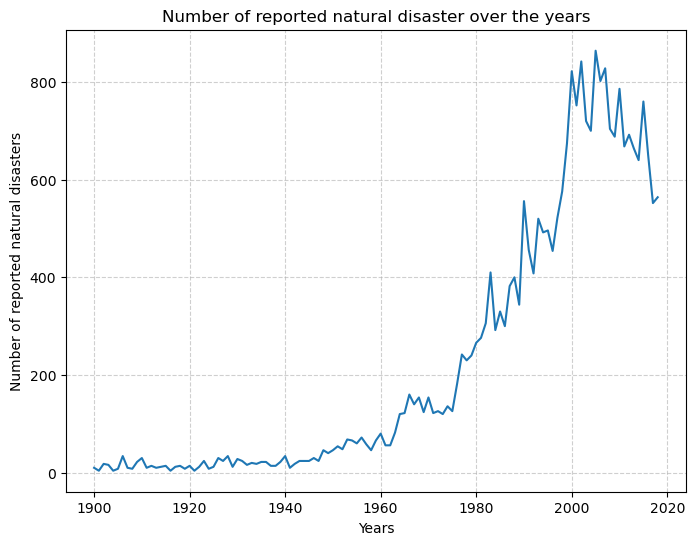

In [60]:
plt.figure(figsize=(8,6))
sns.lineplot(x = report['Year'], y = report['Number of reported natural disasters (reported disasters)'], data = report)
plt.xlabel('Years')
plt.ylabel('Number of reported natural disasters')
plt.title('Number of reported natural disaster over the years')
plt.grid(True, linestyle='--', alpha=0.6)

## Total economic damage from natural disasters (US$) over the years

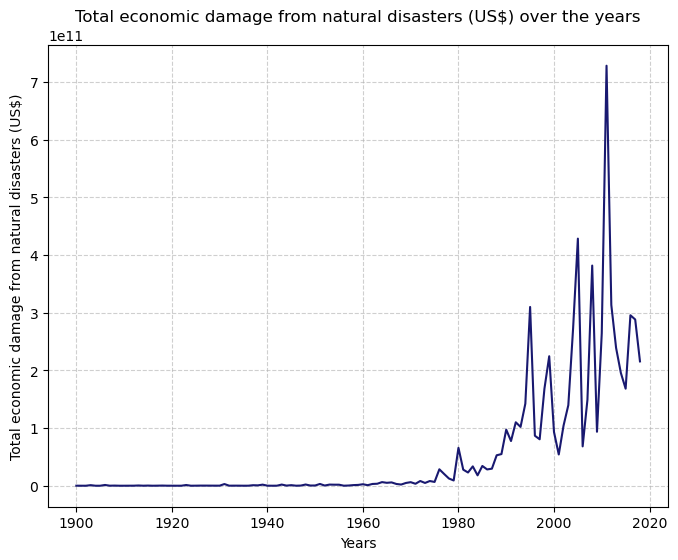

In [122]:
plt.figure(figsize=(8,6))
sns.lineplot(x = report['Year'], y = report['damage(US$)'],color = 'midnightblue', data = report)
plt.xlabel('Years')
plt.ylabel('Total economic damage from natural disasters (US$)')
plt.title('Total economic damage from natural disasters (US$) over the years')
plt.grid(True, linestyle='--', alpha=0.6)

## Top 5 Entities by Economic Damage

In [90]:
dmg = damage.groupby('Entity')['damage(US$)'].sum().reset_index().sort_values('damage(US$)', ascending = False)
damage_grouped_entity = dmg[['Entity', 'damage(US$)']]
damage_grouped_entity

,Entity,damage(US$)
0,All natural disasters,3217239928000
4,Extreme weather,1281599825000
2,Earthquake,814901417000
5,Flood,788212248000
1,Drought,166761974000
10,Wildfire,88234275000
3,Extreme temperature,62866343000
7,Landslide,10485334000
9,Volcanic activity,3933912000
8,Mass movement (dry),211600000


([<matplotlib.patches.Wedge at 0x184b08f7510>,
 [Text(-1.0990512200051221, -0.04567730076583901, 'All natural disasters'),
  Text(0.7297393004303548, -0.8230920686092271, 'Extreme weather'),
  Text(1.0769162883907153, 0.2241680347390455, 'Earthquake'),
  Text(0.5863188849310174, 0.9307148678157283, 'Flood'),
  Text(0.09182359181734308, 1.0961607673994551, 'Drought')],
 [Text(-0.5994824836391575, -0.024914891326821273, '51.3%'),
  Text(0.39803961841655716, -0.44895931015048746, '20.4%'),
  Text(0.5874088845767538, 0.12227347349402481, '13.0%'),
  Text(0.31981030087146395, 0.5076626551722154, '12.6%'),
  Text(0.05008559553673258, 0.5979058731269754, '2.7%')])

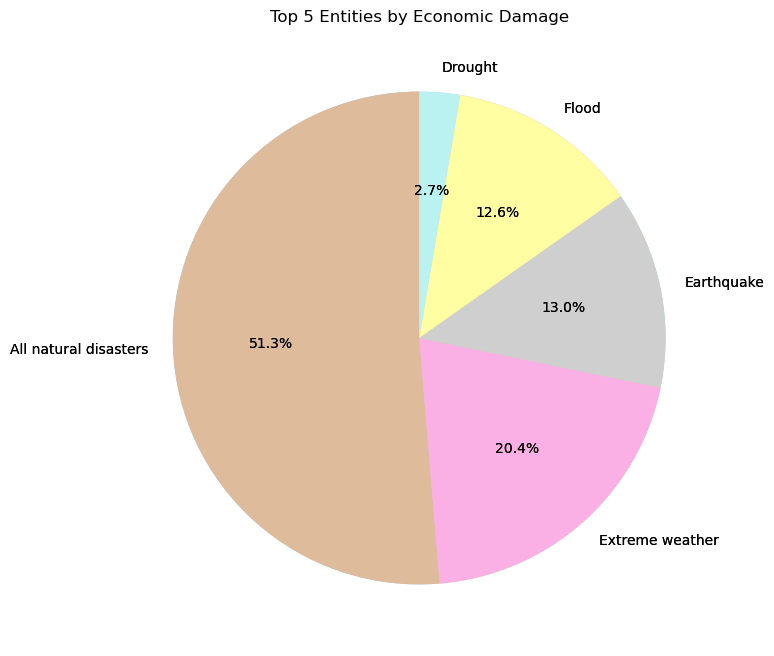

In [115]:
sns.set_palette("pastel")

labels = damage_grouped_entity.head(5)['Entity']
sizes = damage_grouped_entity.head(5)['damage(US$)']

# Create a pie chart with customizations
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Top 5 Entities by Economic Damage')

plt.pie(damage_grouped_entity.head(5)['damage(US$)'], labels=damage_grouped_entity.head(5)['Entity'], autopct='%1.1f%%', startangle=90)


In [111]:
dis = disaster.groupby('Entity')['Number of reported natural disasters (reported disasters)'].sum().reset_index()
dis = dis.sort_values(by='Number of reported natural disasters (reported disasters)', ascending=False)

disaster_grouped_entity = dis[['Entity', 'Number of reported natural disasters (reported disasters)']]
disaster_grouped_entity

,Entity,Number of reported natural disasters (reported disasters)
0,All natural disasters,13212
5,Flood,4960
4,Extreme weather,4129
2,Earthquake,1372
1,Drought,727
7,Landslide,712
3,Extreme temperature,575
10,Wildfire,430
9,Volcanic activity,249
8,Mass movement (dry),57


([<matplotlib.patches.Wedge at 0x184b03b8610>,
 [Text(-1.090675417700995, -0.1429235222864314, 'All natural disasters'),
  Text(0.8611236430473688, -0.6844458133298998, 'Flood'),
  Text(0.9660447806990948, 0.526077448370521, 'Extreme weather'),
  Text(0.39147070528394295, 1.0279837970048422, 'Earthquake'),
  Text(0.10281405714959065, 1.0951845824574236, 'Drought')],
 [Text(-0.5949138642005427, -0.07795828488350802, '54.1%'),
  Text(0.4697038052985647, -0.3733340799981271, '20.3%'),
  Text(0.5269335167449607, 0.2869513354748296, '16.9%'),
  Text(0.2135294756094234, 0.5607184347299138, '5.6%'),
  Text(0.05608039480886762, 0.59737340861314, '3.0%')])

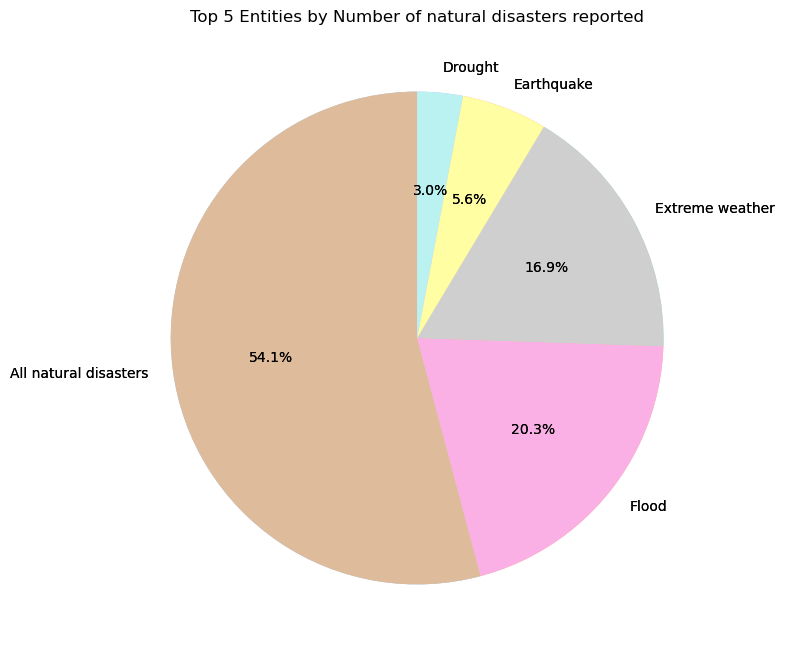

In [113]:
sns.set_palette("pastel")

labels = disaster_grouped_entity.head(5)['Entity']
sizes = disaster_grouped_entity.head(5)['Number of reported natural disasters (reported disasters)']

# Create a pie chart with customizations
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Top 5 Entities by Number of natural disasters reported')

plt.pie(disaster_grouped_entity.head(5)['Number of reported natural disasters (reported disasters)'], labels=disaster_grouped_entity.head(5)['Entity'], autopct='%1.1f%%', startangle=90)


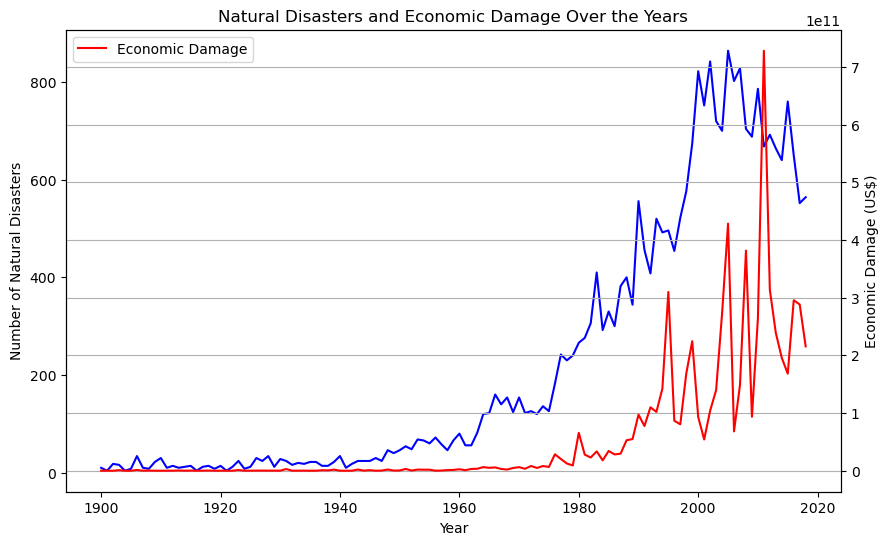

In [120]:
#create a line chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(report['Year'], report['Number of reported natural disasters (reported disasters)'], color='blue', label='Natural Disasters')
plt.xlabel('Year')
plt.ylabel('Number of Natural Disasters')

# Create a line chart for the economic damage
plt.twinx()  # Create a secondary y-axis for the line chart
plt.plot(report['Year'], report['damage(US$)'], color='red', label='Economic Damage')
plt.ylabel('Economic Damage (US$)')

# Set titles and labels
plt.title('Natural Disasters and Economic Damage Over the Years')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.show()